CANCER DATA TEXT CLASSIFICATION....

HI,my name is olanipekun temitope....

this is my text classification analysis on the classification of text as regards tweets on  cancer 

we really want to classify the  texts properly....for us to know which is which....

this dataset was gotten from kaggle.com

let me lead you on a ride of understanding.......

alot of explanations that were dropped here,are as regards the understanding of whoever as come across 

anything related to text classofication, and for those who dont have grounded understanding,at some points i 

chiped in things for you to gather vital knowledge....

my code is basically to keep all codes in my analysis very simple with total explanation of the limits.....

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

In [2]:
df = pd.read_csv('cancerdata.tsv', sep = '\t')
df.head()

,RT @JarrodTheLord: Yall creating life and cloning animals but want us to believe there is no cure for Cancer or Aids... alright https://t.c…,no
0,RT @TommySobiesski: you could give GameStop th...,no
1,This last year has been the hardest of my life...,no
2,The year is 2043. You opened your newspaper an...,no
3,RT @gorskon: Here we go again. Yet another dub...,no
4,So sick of festival kids fingering themselves ...,no


In [3]:
df.tail()

,RT @JarrodTheLord: Yall creating life and cloning animals but want us to believe there is no cure for Cancer or Aids... alright https://t.c…,no
1501,#Predict &amp; #Cure next #Cancer https://t.co...,no
1502,RT @C_Waddington: @steph93065 The Donald could...,no
1503,"In my unpopular opinion, the whole “I don’t wa...",no
1504,@Open_Britain @veckansglitter Presumably if Ma...,no
1505,@TPrilliman @MalkmusMegan @ScrabbleBag @Prison...,no


so from the point that we loaded the datset,we can see clearly that the observation is situated where the 

variable is meant to be....

so we would need to adjust that quickly....

In [4]:
df.index

RangeIndex(start=0, stop=1506, step=1)

In [5]:
#seeing that instead of the observations to be in the rows,its actually in the column
#we need to something about it........
df.columns

Index(['RT @JarrodTheLord: Yall creating life and cloning animals but want us to believe there is no cure for Cancer or Aids... alright https://t.c…', 'no'], dtype='object')

so its being adjusted now actually when you sight it  below,

i created the right  column for it....

In [6]:
df.columns = ['tweets', 'category']
df.head()

,tweets,category
0,RT @TommySobiesski: you could give GameStop th...,no
1,This last year has been the hardest of my life...,no
2,The year is 2043. You opened your newspaper an...,no
3,RT @gorskon: Here we go again. Yet another dub...,no
4,So sick of festival kids fingering themselves ...,no


In [7]:
#doing a value count,,we got to see we have 3 differnt "NO" and 2 "YES"..,thats weird
df['category'].value_counts()

no      1296
yes      207
 no        1
yes        1
no         1
Name: category, dtype: int64

In [8]:

df['category'].unique()

array(['no', 'yes', 'yes ', 'no ', ' no'], dtype=object)

In [9]:
#we create a dict
magic = {'no':'no','yes ':'yes','yes':'yes','no ':'no',' no':'no'}

In [10]:
df['category']  = [magic[x] for x in df['category']]

In [11]:
df['category'].unique()

array(['no', 'yes'], dtype=object)

In [12]:
#properly doing a value count now,and its better ....
df['category'].value_counts()

no     1298
yes     208
Name: category, dtype: int64

In [13]:
#yipee its clean.....
df['category'].isnull().sum()

0

The messages seems to be too lenghty amd links are still dangling around the tweets,so we find a way to remove them

nicely so as to see the tweets in real sense....

In [14]:
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

In [15]:
df['tweets']=df['tweets'].apply(lambda x: remove_links(x))

In [16]:
df.head()

,tweets,category
0,RT @TommySobiesski: you could give GameStop th...,no
1,This last year has been the hardest of my life...,no
2,The year is 2043. You opened your newspaper an...,no
3,RT @gorskon: Here we go again. Yet another dub...,no
4,So sick of festival kids fingering themselves ...,no


Also we want to remove the retweets and also the tweeted at...from the tweets....



In [17]:
def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    tweet = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

In [18]:
df['tweets']=df['tweets'].apply(lambda x: remove_users(x))

In [19]:
df.head()

,tweets,category
0,: you could give GameStop the cure to cancer &...,no
1,This last year has been the hardest of my life...,no
2,The year is 2043. You opened your newspaper an...,no
3,: Here we go again. Yet another dubious cancer...,no
4,So sick of festival kids fingering themselves ...,no


also we remove the punctiation marks existing in the tweets...

In [20]:
def remove_punc(text):
    no_punc = ''.join([c for c in text if c not in string.punctuation])
    return no_punc

In [21]:
df['tweets']=df['tweets'].apply(lambda x: remove_punc(x))

In [22]:
df.head()

,tweets,category
0,you could give GameStop the cure to cancer am...,no
1,This last year has been the hardest of my life...,no
2,The year is 2043 You opened your newspaper and...,no
3,Here we go again Yet another dubious cancer c...,no
4,So sick of festival kids fingering themselves ...,no


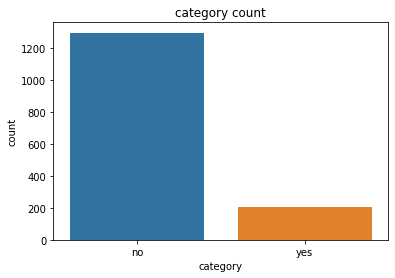

In [23]:
#Plot the counts of category 
sns.countplot(data = df, x= df['category']).set_title("category count")
plt.show()

lets split our data into test and train.....

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(df['tweets'],df['category'],test_size=0.30,random_state=0) 
print("data_train, labels_train : ",data_train.shape, labels_train.shape)
print("data_test, labels_test: ",data_test.shape, labels_test.shape)

data_train, labels_train :  (1054,) (1054,)
data_test, labels_test:  (452,) (452,)


**Extraction & CountVectorize**


*The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.*

In this same context we have fit and transform,

in which FIT:build dict(i.e, word->wordID)
    TRANSFORM :Convert document(i.e, each line in the file) to word vector

In [25]:
vectorizer = CountVectorizer() 
df_train_count = vectorizer.fit_transform(data_train)
df_test_count  = vectorizer.transform(data_test)

In [47]:
from sklearn.pipeline import Pipeline



**Modelling & training**

Multinomial Naive Bayes is a specialized version of Naive Bayes that is designed more for text documents. Whereas simple naive Bayes would model a document as the presence and absence of particular words, multinomial naive bayes explicitly models the word counts and adjusts the underlying calculations to deal with in.

It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [43]:
clf = MultinomialNB()
clf.fit(df_train_count, labels_train)
predictions = clf.predict(df_test_count)
predictions

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no'

 we create an instance of LogisticRegression and train our model. Like
LinearRegression, LogisticRegression implements the fit() and predict()
methods. As a sanity check, we printed a few predictions for manual inspection:

In [45]:
t_cal = Pipeline([('tfid', TfidfVectorizer()), ('cal', LogisticRegression())])

In [46]:
t_cal.fit(data_train, labels_train)

Pipeline(memory=None,
         steps=[('tfid',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('cal',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=

In [54]:
from sklearn.linear_model.logistic import LogisticRegression

classifier = LogisticRegression()
classifier.fit(df_train_count, labels_train)
predictions = classifier.predict(df_test_count)
for i, prediction in enumerate(predictions[:3]):
    print ('Prediction: %s. Message: %s' % (prediction, df_test_count[i]))


Prediction: no. Message:   (0, 262)	1
  (0, 314)	1
  (0, 339)	3
  (0, 395)	1
  (0, 399)	5
  (0, 467)	1
  (0, 698)	1
  (0, 714)	1
  (0, 863)	1
  (0, 864)	1
  (0, 909)	1
  (0, 1378)	1
  (0, 1477)	1
  (0, 1662)	1
  (0, 1911)	1
  (0, 2021)	1
  (0, 2207)	1
  (0, 2314)	3
  (0, 2640)	1
  (0, 2878)	6
  (0, 2917)	2
  (0, 3027)	1
  (0, 3160)	1
  (0, 3286)	1
  (0, 3362)	3
  :	:
  (0, 3777)	1
  (0, 3804)	1
  (0, 3829)	1
  (0, 3875)	1
  (0, 3995)	1
  (0, 4126)	1
  (0, 4690)	2
  (0, 4884)	1
  (0, 4956)	1
  (0, 4985)	1
  (0, 5000)	1
  (0, 5217)	1
  (0, 5315)	1
  (0, 5345)	2
  (0, 5348)	1
  (0, 5428)	3
  (0, 5447)	1
  (0, 5469)	1
  (0, 5749)	1
  (0, 5836)	1
  (0, 5859)	1
  (0, 5874)	1
  (0, 5930)	1
  (0, 5961)	1
  (0, 5991)	1
Prediction: no. Message:   (0, 233)	1
  (0, 299)	1
  (0, 399)	1
  (0, 630)	1
  (0, 909)	1
  (0, 980)	1
  (0, 1055)	1
  (0, 1284)	1
  (0, 1378)	1
  (0, 1575)	1
  (0, 1665)	1
  (0, 1893)	1
  (0, 1905)	1
  (0, 2105)	1
  (0, 2263)	1
  (0, 2429)	1
  (0, 2460)	1
  (0, 2678)	1
  (0, 281

scikit-learn provides a function to calculate the precision and recall for a classifier

from a set of predictions and the corresponding set of trusted labels.

so we would import metrics from the sklearn library to carry the obligation out

In [32]:
from sklearn import metrics

In [48]:
prediction = t_cal.predict(data_test)

In [49]:
print(metrics.classification_report(labels_test, prediction))

              precision    recall  f1-score   support

          no       0.87      1.00      0.93       391
         yes       1.00      0.02      0.03        61

    accuracy                           0.87       452
   macro avg       0.93      0.51      0.48       452
weighted avg       0.88      0.87      0.81       452



take note ;PRECISION: is the fraction of postive predictions that are correct.....

Our classifier's precision is 0.87, for no and 1.00 for yes, almost all of the tweets that it predicted as

no were actually no. Its recall is higher as you can see .....,.but for yes,its not actually the same...!!!
    
Now our precision and recall,

may vary since the training and test data are randomly partitioned.

also the F1 measure is the harmonic mean, or weighted average, of the precision and

recall scores. Also called the f-measure or the f-score...

The F1 measure penalizes classifiers with imbalanced precision and recall scores,

 A model with perfect

precision and recall scores will achieve an F1 score of one. A model with a perfect

precision score and a recall score of zero will achieve an F1 score of zero.

lets take note!!!!!!

Even though our accurcay score was shown above,we literally wanted a clearer views as regards the accuracy,that's

why we did it down here.....



In [51]:
from sklearn.metrics import accuracy_score

print ("accuracy_score : ", accuracy_score(labels_test, prediction))

accuracy_score :  0.8672566371681416


[[391   0]
 [ 60   1]]


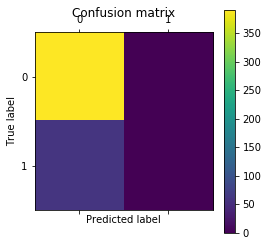

In [52]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

confusion_matrix = confusion_matrix(labels_test, prediction)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


[[391   0]
 [ 60   1]]


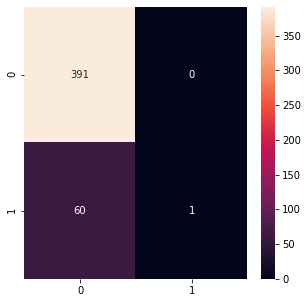

In [53]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confusion_matrix = confusion_matrix(labels_test, prediction)
fig, ax = plt.subplots(figsize =(5,5))
sns.heatmap(confusion_matrix,annot = True, fmt = 'd') 
            


print(confusion_matrix)


finally we have come to the end of this work book...hope you got soemthing form it with my little explanation

i hope to post more as time goes on......

am olanipekun temitope

the STATISTICIAN(data analyst)